In [100]:


from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import wrangle as w
import evaluate as e
import typing
reload(w)
# assuming X and y are already defined



<module 'wrangle' from '/Users/woody/codeup-data-science/regression-exercises/wrangle.py'>

Exercises

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

Load your zillow dataset.



In [101]:
zillow_df = w.wrangle_zillow()
zillow_df = w.handle_outliers(zillow_df)
train, validate, test = w.tvt_split(zillow_df)
train_sample = train
zillow_df.head()

,bed_count,bath_count,calc_finished_sqft,tax_value,year_built,taxes,fips
0,4,3.0,2090.0,615000.0,1973,8625.75,6037
1,5,3.0,2479.0,531642.0,1973,6722.67,6037
2,4,2.0,2057.0,328148.0,1973,4160.63,6037
3,4,3.0,2423.0,297377.0,1978,3883.47,6037
4,4,3.0,2226.0,297001.0,1978,3884.27,6037



Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

Here is some sample code to get you started:


Modify and add to the code above as necessary for it to work with the zillow dataset.


In [102]:
from sklearn.linear_model import LinearRegression
x = train_sample.calc_finished_sqft.to_numpy().reshape(-1,1)
y = train_sample.tax_value
train_sample['yhat_base'] = np.round(train_sample.tax_value.mean(),2)
linreg = LinearRegression()
linreg.fit(x,y)
train_sample['yhat'] = np.round(linreg.predict(x),2)
train_sample['res_base'] = train_sample.yhat_base - train_sample.tax_value
train_sample['res'] = train_sample.yhat - train_sample.tax_value
train_sample.res.sort_values().head()

2377806   -1928396.13
2776089   -1912497.10
1891364   -1910502.04
1828597   -1883389.96
524636    -1882871.10
Name: res, dtype: float64


Plot the residuals for the linear regression model that you made.



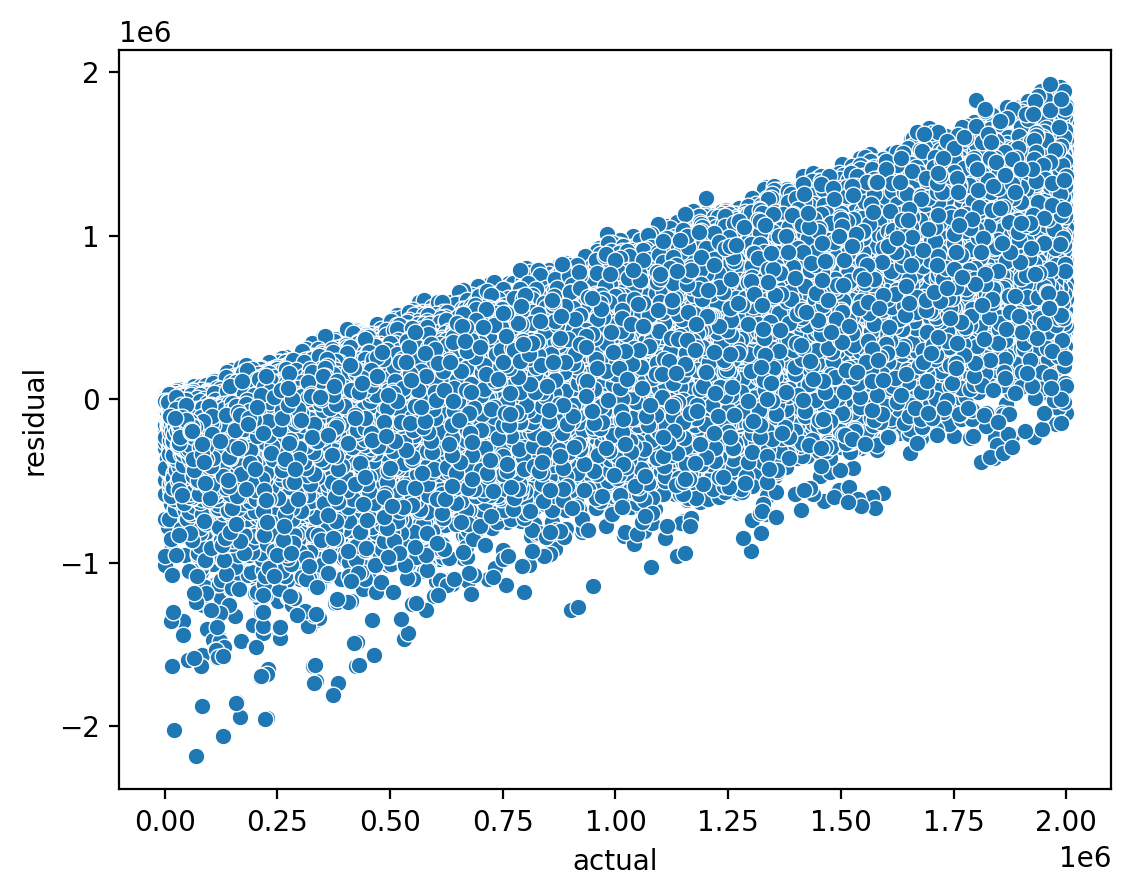

In [103]:
def plot_residuals(y_true,y_pred):
    res = get_residuals(y_true,y_pred)
    sns.scatterplot(data=res,x='actual',y='residual')
plot_residuals(train_sample.tax_value,train_sample.yhat)

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.


In [104]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
def get_residuals(y_true:pd.Series,y_pred:typing.Union[pd.Series,float]):
    ret_frame = pd.DataFrame()
    ret_frame['actual'] = y_true
    ret_frame['residual'] = y_true - y_pred
    ret_frame['residual_squared'] = ret_frame.residual ** 2
    return ret_frame
def sum_of_squared_errors(y_true:pd.Series,y_pred:typing.Union[pd.Series,float]):
    ret_frame = get_residuals(y_true,y_pred)
    sse = sum(ret_frame.residual_squared)
    return sse
def explained_sum_of_sqrd(y_true:pd.Series,y_pred:pd.Series):
    return sum((y_pred - y_true.mean())**2)
def total_sum_of_squares(y_true:pd.Series,y_pred:typing.Union[pd.Series,float]):
    return explained_sum_of_sqrd(y_true,y_pred) + sum_of_squared_errors(y_true,y_pred)
def regression_evaluation(y_true,y_pred,title):
    ret_dict = {}
    ret_dict['SSE'] = sum_of_squared_errors(y_true,y_pred)
    if not isinstance(y_pred,float):
        ret_dict['ESS'] = explained_sum_of_sqrd(y_true,y_pred)
        ret_dict['TSS'] = ret_dict['SSE'] + ret_dict['ESS']
        ret_dict['MSE'] = mean_squared_error(y_true,y_pred)
    else:
        ret_dict['MSE'] = mean_squared_error(y_true,[y_pred for i in range(y_true.count())])
    ret_dict['RMSE']= sqrt(ret_dict['MSE'])
    ret_frame =  pd.DataFrame(ret_dict,index=[title])
    return ret_frame


In [105]:
reg_eval = regression_evaluation(train_sample.tax_value,train_sample.yhat,'Model')
reg_eval

,SSE,ESS,TSS,MSE,RMSE
Model,1.454764e+17,7.873592e+16,2.242123e+17,6.203173e+10,249061.706537



Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).



In [110]:
base_eval = regression_evaluation(train_sample.tax_value,train_sample.tax_value.mean(),'Baseline')
base_eval

,SSE,MSE,RMSE
Baseline,2.242123e+17,9.560506e+10,309200.67127


Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.



In [109]:
(reg_eval['SSE'].values < base_eval['SSE'].values)[0]

True

What is the amount of variance explained in your model?



In [108]:
explained_variance_score(train_sample.tax_value,train_sample.yhat)* 100


35.11668019108721

Is your model better than the baseline model?
# Yep! I
Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot

regression_errors(y, yhat): returns the following values:

    sum of squared errors (SSE)
    explained sum of squares (ESS)
    total sum of squares (TSS)
    mean squared error (MSE)
    root mean squared error (RMSE)
baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false